# Work with meta-information

Nabla2DFT includes three independent datasets. You can mix data from several datasets and fuse records together using unique identifiers of the molecule and conformation.

Each record has two IDs:

- moses_id is an index of molecules in the MOSES database.
- conformation_id is an index of conformation for the specific molecule.

Order of records in nablaDFT databases are incompatible, but `moses_id` and `conformation_id` are unique identifiers of conformation and molecule across all databases.

Records in the dataset of optimization trajectories have `iteration`. This is a numerical identifier for molecular configuration in the optimization trajectory.

In [1]:
import ase
from ase.db import connect

Some meta-information includes energy databases and is accessible with the Atomic Simulation Environment.

In [2]:
with connect("train_2k_v2_formation_energy_w_forces.db") as train_db:
    atom_row = train_db.get(1)
    print(atom_row.key_value_pairs)
    print(train_db.metadata)
    # row = atom_row.toatoms() 

{'moses_id': 164, 'conformation_id': 0, 'smiles': 'CCOC(=O)C1CN(Cc2ccccc2)C(=O)C1=O'}
{'_distance_unit': 'Ang', '_property_unit_dict': {'energy': 'Hartree', 'forces': 'Hartree/Ang'}}


In advance, you can work with SMILES, the energy dictionary of PSI4, the HOMO-LUMO gap, dipoles, and other parameters of molecule and conformation via `summary.csv` (1,86G in .gz format). This file is much smaller in comparison with databases or the full dataset of raw PSI4 wavefunctions.

In [4]:
!wget http://a002dlils-kadurin-nabladft.obs.ru-moscow-1.hc.sbercloud.ru/data/nablaDFTv2/summary.csv.gz
!gzip -d summary.csv.gz

--2024-06-12 15:58:16--  http://a002dlils-kadurin-nabladft.obs.ru-moscow-1.hc.sbercloud.ru/data/nablaDFTv2/summary.csv.gz
Resolving a002dlils-kadurin-nabladft.obs.ru-moscow-1.hc.sbercloud.ru (a002dlils-kadurin-nabladft.obs.ru-moscow-1.hc.sbercloud.ru)... 46.243.206.34, 46.243.206.35
Connecting to a002dlils-kadurin-nabladft.obs.ru-moscow-1.hc.sbercloud.ru (a002dlils-kadurin-nabladft.obs.ru-moscow-1.hc.sbercloud.ru)|46.243.206.34|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1997105126 (1,9G) [binary/octet-stream]
Saving to: ‘summary.csv.gz.1’

summary.csv.gz.1      0%[                    ]   6,17M  5,37MB/s               ^C
gzip: summary.csv already exists; do you wish to overwrite (y or n)? ^C


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [11]:
summary = pd.read_csv('summary.csv', index_col=0, nrows=100)

In [12]:
summary.columns

Index(['MOSES id', 'CONFORMER id', 'archive name', 'DFT TOTAL ENERGY',
       'DFT XC ENERGY', 'DFT NUCLEAR REPULSION ENERGY',
       'DFT ONE-ELECTRON ENERGY', 'DFT TWO-ELECTRON ENERGY', 'DFT DIPOLE X',
       'DFT DIPOLE Y', 'DFT DIPOLE Z', 'DFT TOTAL DIPOLE',
       'DFT ROT CONSTANT A', 'DFT ROT CONSTANT B', 'DFT ROT CONSTANT C',
       'DFT HOMO', 'DFT LUMO', 'DFT HOMO-LUMO GAP', 'DFT ATOMIC ENERGY',
       'DFT FORMATION ENERGY', 'SMILES', 'SPLITS'],
      dtype='object')

In [13]:
summary[['MOSES id', 'CONFORMER id', 'SMILES', 'SPLITS']]

,MOSES id,CONFORMER id,SMILES,SPLITS
0,1,0,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
1,1,1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
2,1,2,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
3,1,3,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
4,1,4,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,test_full_conformations
...,...,...,...,...
95,26,4,CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F,train_full
96,26,5,CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F,train_full
97,26,6,CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F,train_full
98,26,7,CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F,train_full


You can plot and analyze information directly from the .csv file. SPLITS column includes tag to identify splits of the records.

In [14]:
summary = pd.read_csv('summary.csv', index_col=0)

In [15]:
train_full = summary[summary['SPLITS'] == 'train_full']
train_full

,MOSES id,CONFORMER id,archive name,DFT TOTAL ENERGY,DFT XC ENERGY,DFT NUCLEAR REPULSION ENERGY,DFT ONE-ELECTRON ENERGY,DFT TWO-ELECTRON ENERGY,DFT DIPOLE X,DFT DIPOLE Y,...,DFT ROT CONSTANT A,DFT ROT CONSTANT B,DFT ROT CONSTANT C,DFT HOMO,DFT LUMO,DFT HOMO-LUMO GAP,DFT ATOMIC ENERGY,DFT FORMATION ENERGY,SMILES,SPLITS
0,1,0,data/moses_wfns/archive_0_0_0.tar,-1300.896067,-102.375307,1658.713422,-5071.516025,2214.311790,-1.806337,-3.755724,...,0.018157,0.004653,0.004180,-0.311180,0.017776,0.328956,-1294.500711,-6.395356,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
1,1,1,data/moses_wfns/archive_0_0_0.tar,-1300.899902,-102.429213,1680.799786,-5115.351584,2236.111433,-0.686522,-3.981607,...,0.015678,0.005575,0.004542,-0.302982,0.018677,0.321659,-1294.500711,-6.399191,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
2,1,2,data/moses_wfns/archive_0_0_0.tar,-1300.904099,-102.418626,1659.441723,-5073.046880,2215.149221,-2.391864,-2.333644,...,0.017954,0.004708,0.004167,-0.311098,0.018097,0.329195,-1294.500711,-6.403388,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
3,1,3,data/moses_wfns/archive_0_0_0.tar,-1300.897094,-102.430203,1679.790185,-5113.238802,2235.012044,0.788940,-3.194971,...,0.015418,0.005608,0.004613,-0.302444,0.019934,0.322378,-1294.500711,-6.396383,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
5,1,5,data/moses_wfns/archive_0_0_0.tar,-1300.894981,-102.449810,1685.260907,-5124.555389,2240.880631,-3.211841,0.104902,...,0.018241,0.005084,0.004491,-0.307153,0.019568,0.326721,-1294.500711,-6.394270,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676258,1936961,6,data/moses_wfns_big/wfns_moses_conformers_arch...,-1105.745861,-106.387328,2115.424745,-5707.709936,2592.963455,1.034399,-0.675494,...,0.009904,0.004782,0.003580,-0.321370,0.049091,0.370461,-1097.647221,-8.098641,CC(NC(=O)OC(C)(C)C)c1nc(CO)nn1Cc1ccccc1,train_full
12676259,1936961,7,data/moses_wfns_big/wfns_moses_conformers_arch...,-1105.752018,-106.424034,2135.021265,-5746.548140,2612.236577,1.333813,-4.279909,...,0.011478,0.004750,0.003623,-0.322147,0.042127,0.364274,-1097.647221,-8.104797,CC(NC(=O)OC(C)(C)C)c1nc(CO)nn1Cc1ccccc1,train_full
12676260,1936961,8,data/moses_wfns_big/wfns_moses_conformers_arch...,-1105.732389,-106.403981,2099.174980,-5674.970284,2576.504118,2.002324,-3.222680,...,0.010857,0.004202,0.003374,-0.323588,0.042082,0.365670,-1097.647221,-8.085169,CC(NC(=O)OC(C)(C)C)c1nc(CO)nn1Cc1ccccc1,train_full
12676261,1936961,9,data/moses_wfns_big/wfns_moses_conformers_arch...,-1105.740275,-106.453281,2100.124252,-5677.147649,2577.772667,-0.255102,-1.570945,...,0.010969,0.004118,0.003472,-0.316804,0.045990,0.362794,-1097.647221,-8.093055,CC(NC(=O)OC(C)(C)C)c1nc(CO)nn1Cc1ccccc1,train_full


In [16]:
print(f"Number of molecules: {len(np.unique(train_full['MOSES id']))}")
print(f"Number of conformations: {len(train_full['CONFORMER id'])}")

Number of molecules: 1485014
Number of conformations: 8349575


In [17]:
dict_id_conf = {}

for id_, conf_id_ in zip(train_full['MOSES id'], train_full['CONFORMER id']):
    if id_ not in dict_id_conf:
        dict_id_conf[id_] = 0
    dict_id_conf[id_] += 1

In [18]:
num_of_conf = [ci for i, ci in dict_id_conf.items()]

dict_conf_size = {}

for id_ in num_of_conf:
    if id_ not in dict_conf_size:
        dict_conf_size[id_] = 0
    dict_conf_size[id_] += 1

dict_conf_size = np.array(list(dict_conf_size.items()))

Text(0.5, 0, 'Number of conformations per molecule')

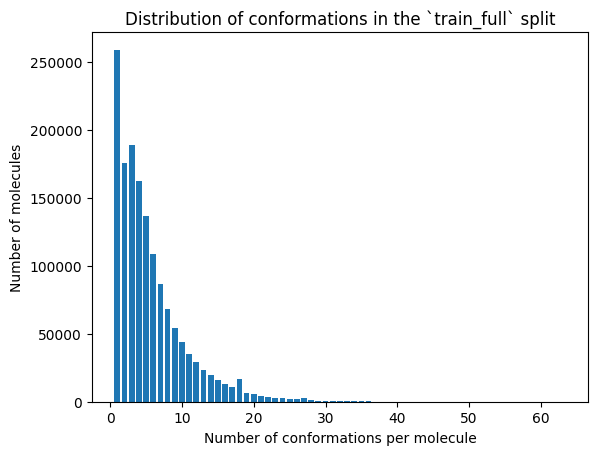

In [19]:
plt.bar(dict_conf_size[:,0], dict_conf_size[:,1])
plt.title("Distribution of conformations in the `train_full` split")
plt.ylabel('Number of molecules')
plt.xlabel('Number of conformations per molecule')